<img src="https://raw.githubusercontent.com/minusxai/.github/master/profile/logo.png" alt="logo" width="300"/>

**Note: Make sure you have the [minusx chrome extension installed](https://minusx.ai/chrome-extension)**

In [ ]:
# jupyterlite setup stuff
import piplite
await piplite.install(["distutils", "ipywidgets==7.7.0", "bqplot==0.12.30", "plotly==5.8.0", "scikit-learn"])

---

# Demo Feature 2: Modify Existing Notebook
1. Start from an existing notebook with analysis
2. Modify plots
3. Extend an existing analysis


In [156]:
import pandas as pd
import numpy as np
from plotly import express as px

df = pd.read_csv("./data/yc_data.csv")
df

,batch_idx,company_id,company_name,short_description,long_description,batch,status,tags,location,country,year_founded,num_founders,founders_names,team_size,website,cb_url,linkedin_url
0,0,379,Reddit,The frontpage of the internet.,Founded by Steve Huffman and Alexis Ohanian in...,S05,Acquired,"['community', 'social-media', 'social', 'socia...",San Francisco,US,NaN,1,['Steve Huffman'],2000.0,http://reddit.com,https://www.crunchbase.com/organization/reddit,NaN
1,0,378,Kiko,We're the best online calendar solution to eve...,Kiko is a web calendar for anyone who wants to...,S05,Acquired,['calendar'],"Cambridge, MA",US,2005.0,2,"['Justin Kan', 'Emmett Shear']",0.0,http://kiko.com,https://www.crunchbase.com/organization/kiko,NaN
2,0,375,Clickfacts,NaN,ClickFacts is a Malware Software Solutions com...,S05,Acquired,[],San Francisco,US,NaN,3,"['Mikhail Gurevich', 'Mikhail Ledvich', 'greg ...",11.0,http://clickfacts.com,https://www.crunchbase.com/organization/clickf...,NaN
3,0,374,TextPayMe,NaN,"Founded in 2005, TextPayMe is an SMS payment s...",S05,Acquired,[],"Redmond, WA",US,NaN,1,['Phil Yuen'],11.0,http://textpayme.com,https://www.crunchbase.com/organization/textpayme,NaN
4,0,380,Infogami,NaN,What is Infogami?\n\nThe art of transforming d...,S05,Inactive,[],"London, United Kingdom",GB,NaN,1,['Aaron Swartz'],2.0,http://infogami.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,38,29177,Danswer,Open Source AI Assistant and Enterprise Search,Danswer is the AI assistant that connects to a...,W24,Active,[],NaN,NaN,2023.0,2,"['Yuhong Sun', 'Chris Weaver']",2.0,https://www.danswer.ai/,NaN,https://www.linkedin.com/in/danswer-ai/
4582,38,28965,Yenmo,Secured consumer lending in India,Yenmo offers a better way to access cash for I...,W24,Active,"['fintech', 'lending', 'consumer-finance']","Bengaluru, India",IN,NaN,2,"['Ashutosh Purohit', 'Aryan Agarwal']",5.0,https://yenmo.in/,NaN,https://www.linkedin.com/company/yenmo-in/
4583,38,28896,GovernGPT,AI Back Office for Private Funds,For money managers to raise their next billion...,W24,Active,"['artificial-intelligence', 'finance', 'b2b', ...","Toronto, Canada",CA,2023.0,2,"['Mamal Amini', 'Oliver Walerys']",2.0,https://www.governgpt.ai/,NaN,https://www.linkedin.com/company/93647085/
4584,38,29206,Stitch Technologies,-,NaN,W24,Inactive,"['developer-tools', 'saas']","London, United Kingdom",GB,2023.0,2,"['Till Kern', 'Yuriy Oparenko']",0.0,https://www.stitch.tech,NaN,https://www.linkedin.com/company/stitch-tech


## Derived columns

In [157]:
df['success'] = df['status'].apply(lambda x: False if x=='Inactive' else True)

## 1. Batch Composition Analysis

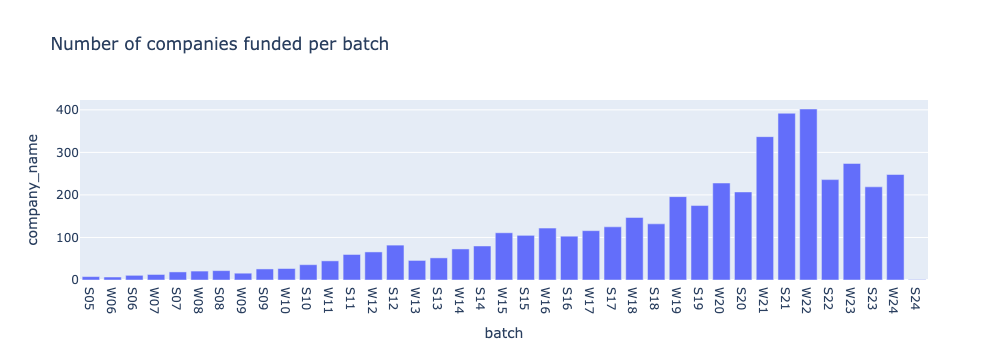

In [158]:
# Companies in each batch
agg = df.groupby(['batch', 'batch_idx']).agg({'company_name': 'count'}).reset_index()
fig = px.bar(agg.sort_values('batch_idx'), x='batch', y="company_name", title="Number of companies funded per batch")
fig.show()

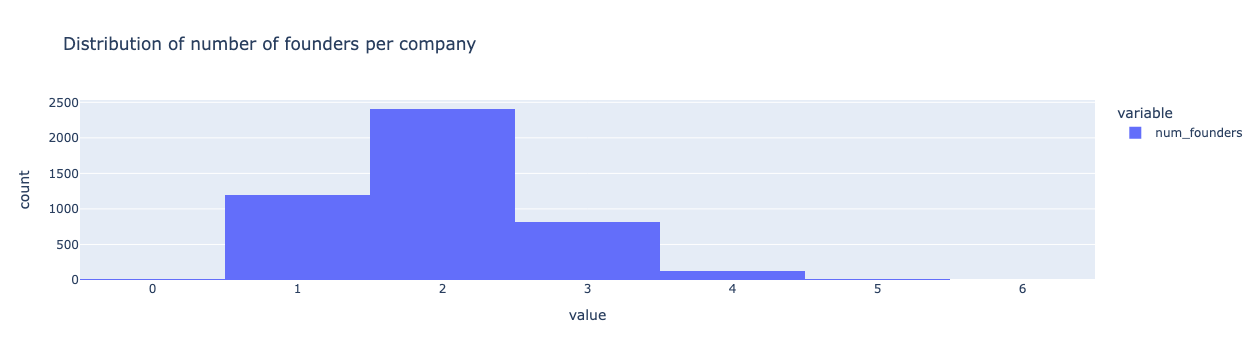

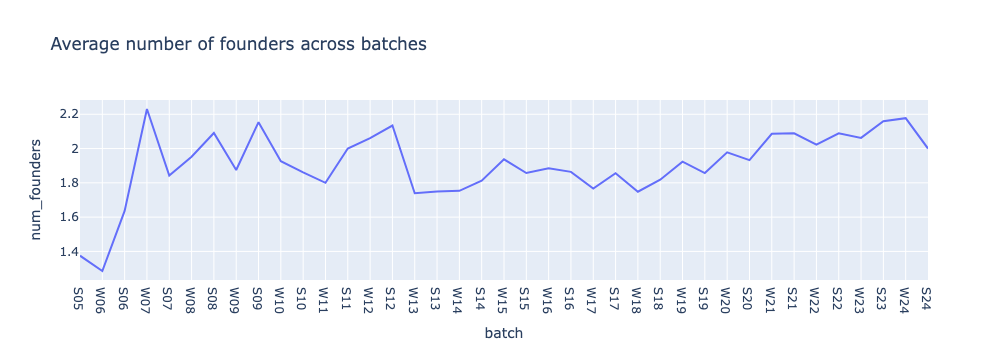

In [159]:
# Number of founders distribution
fig = px.histogram(df['num_founders'], title="Distribution of number of founders per company")
fig.show()

# Average number of founders across batches
agg = df.groupby(['batch', 'batch_idx']).agg({'num_founders': 'mean'}).reset_index()
fig = px.line(agg.sort_values('batch_idx'), x='batch', y='num_founders', title="Average number of founders across batches")
fig.show()



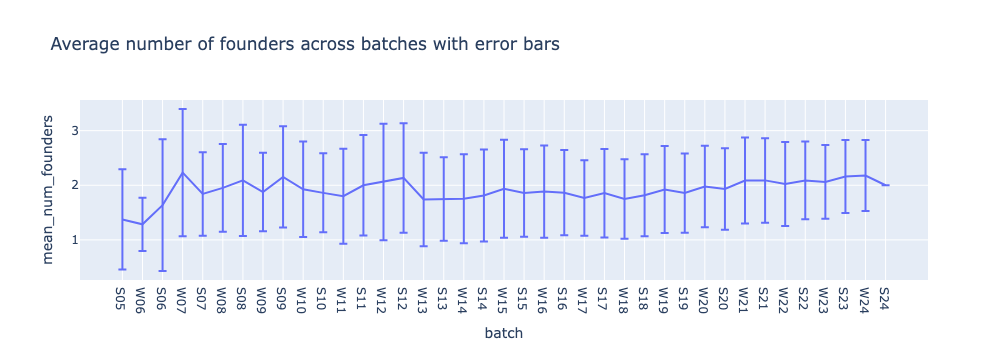

In [160]:
# Calculate the mean and standard deviation of the number of founders per batch
agg = df.groupby(['batch', 'batch_idx']).agg({'num_founders': ['mean', 'std']}).reset_index()
agg.columns = ['batch', 'batch_idx', 'mean_num_founders', 'std_num_founders']

# Plot the average number of founders across batches with error bars
fig = px.line(agg.sort_values('batch_idx'), x='batch', y='mean_num_founders', error_y='std_num_founders', title="Average number of founders across batches with error bars")
fig.show()

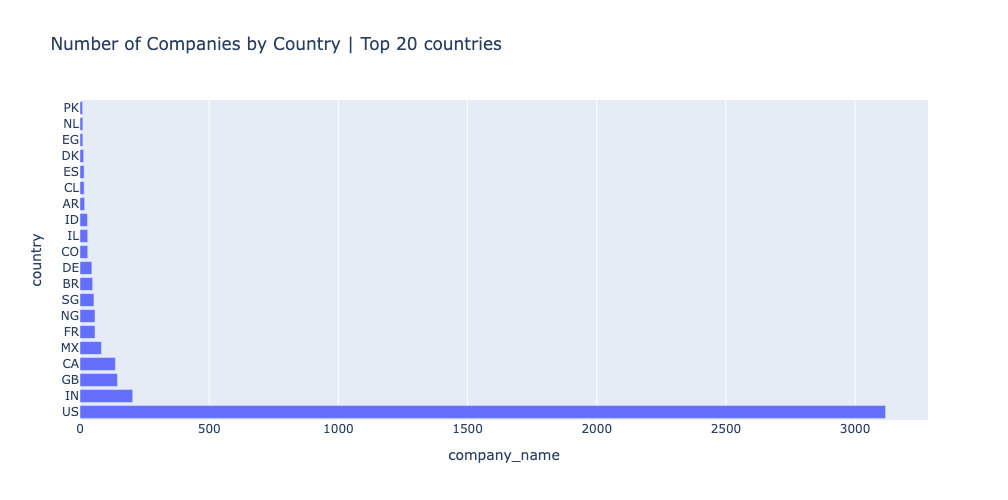

In [161]:
agg = df.groupby(['country']).agg({'company_name': 'count'}).reset_index()
fig = px.bar(agg.sort_values('company_name', ascending=False).head(20), y='country', x='company_name', title='Number of Companies by Country | Top 20 countries',
             orientation='h', height=500, width=1000)
fig.show()

## 2. Success of Companies

In [162]:
# simple correlation checks
batch_success_corr = np.corrcoef(df['batch_idx'], df['success'])[0, 1]
founders_success_corr = np.corrcoef(df['num_founders'], df['success'])[0, 1]

print(batch_success_corr, founders_success_corr)

0.365857627856041 0.053903680472408594


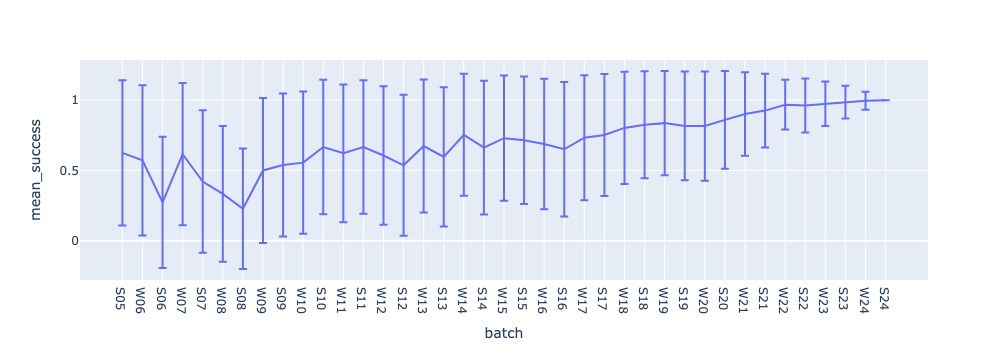

In [163]:
agg = df.groupby(['batch', 'batch_idx']).agg({'success': ['mean', 'std']}).reset_index()
agg.columns = ['batch', 'batch_idx', 'mean_success', 'std_success']
fig = px.line(agg.sort_values('batch_idx'), x="batch", y="mean_success", error_y='std_success')
fig.show()



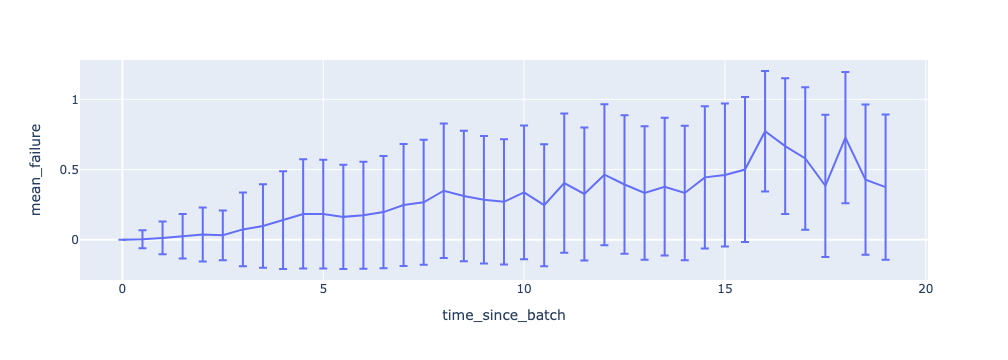

In [164]:
# Add a column 'time_since_batch'
current_year = 24
df['time_since_batch'] = df['batch'].apply(lambda x: (current_year - int(x[1:])) + (0.5 if x[0] == 'W' else 0))
df['failure'] = ~df['success']


agg = df.groupby(['time_since_batch']).agg({'failure': ['mean', 'std']}).reset_index()
agg.columns = ['time_since_batch', 'mean_failure', 'std_failure']
fig = px.line(agg, x="time_since_batch", y="mean_failure", error_y='std_failure')
fig.show()



---
# Things you can try:
**Note: Execute all cells so far (jupyterlite takes a while the first time you do it)**

- Modify existing cells
  - "Can you change the line plot to bar plot with error bars?"
  - (Focus on any cell) "Can you add a title to this plot"
- Extend analysis
  - "Perform linear regression to estimate the relationship between time_since_batch and mean_failure, and plot it"
  - "How does the mean_failure % of a company vary with each additional year after batch?"
